# ZTF RRLyrae data

Eric Bellm
January 2020

Programatically retrieve data for use in the RR Lyrae exercise.

In [106]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

[ztfquery](https://github.com/MickaelRigault/ztfquery) provides a convenient interface to the [IRSA ZTF archive](https://irsa.ipac.caltech.edu/Missions/ztf.html).  

Install it with `pip install ztfquery`

In [43]:
from ztfquery import lightcurve

### Retrieve an input RR Lyrae catalog

We are not searching from scratch, but will use the RR Lyrae candidates identified from ZTF in [Huang and Koposov 2022](https://ui.adsabs.harvard.edu/abs/2022MNRAS.510.3575H/abstract).  The catalog itself can be downloaded [here](https://zenodo.org/record/5774018).

In [92]:
tbl = Table.read('../data/rrl_main_cat.csv')

In [93]:
tbl

objid,source_id,ra,dec,prob_rrl,best_period,ebv,distance,mean_g,mean_r,mean_i,phot_g_mean_mag,amp_1_r,phi_1_r,amp_1_g,phi_1_g,amp_1_i,phi_1_i,amp_2_r,phi_2_r,amp_2_g,phi_2_g,amp_2_i,phi_2_i,amp_3_r,phi_3_r,amp_3_g,phi_3_g,amp_3_i,phi_3_i,ngooddet_g,ngooddet_r,ngooddet_i
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
245101100001850,2323207596351730304,4.34881002091745,-26.7325358431298,0.95,0.621282,0.0177999,35202.5,18.448895,18.263773,--,18.2781,0.310712,-0.42090702,0.4296189,-0.5540015,--,--,0.13699114,1.1193074,0.18674164,1.1728027,--,--,0.077739686,2.9355524,0.111421965,2.6032557,--,--,74,76,0
245101200001823,2323151181956812672,3.44761987859165,-26.7369695263057,0.89,0.363568,0.0223381,20908.6,17.66247,17.58033,--,17.573,0.21442999,2.6106074,0.31068435,2.6765757,--,--,0.025368612,0.7849637,0.04944191,0.691132,--,--,0.02951918,-1.65067,0.016883053,-1.8536656,--,--,80,81,0
245101200006240,2323082286386272640,3.83587158932291,-27.0437438733329,0.99,0.566281,0.021689,19608.2,17.265985,17.059336,--,17.0437,0.24486491,2.5618405,0.34430373,2.4899223,--,--,0.11433268,0.9279561,0.16546234,1.0097619,--,--,0.08503796,-0.7780889,0.113629706,-0.9787848,--,--,79,79,0
245102200002148,2333889115592815616,1.83508756403094,-26.7386565560488,0.97,0.501806,0.0190932,17462.7,17.080528,16.90064,--,17.0114,0.31278467,3.0024025,0.44559923,2.9263508,--,--,0.1482002,2.0833945,0.21522047,2.0611908,--,--,0.11036861,0.81837624,0.18304227,0.821719,--,--,82,80,0
245103100001517,2333944331692281728,0.885322879300275,-26.5988557305232,0.98,0.58118,0.0158643,13775.1,16.47706,16.245916,--,16.2358,0.18669358,-2.1638775,0.2724687,-2.3415463,--,--,0.09654707,-2.277384,0.12579872,-2.3305018,--,--,0.058639035,-2.5625422,0.07181948,-2.9064033,--,--,82,84,0
245103100002038,2334596681389448192,0.268704425294681,-26.6972408543714,0.79,0.613461,0.015369,59100.4,19.55729,19.410467,--,19.4415,0.27695486,-3.0480475,0.37774724,2.9442918,--,--,0.07293855,1.9353324,0.09814847,2.2232306,--,--,0.10155248,1.5703725,0.056697316,1.1640925,--,--,69,71,0
245103100005002,2334605997174339456,0.513661672542887,-26.4832320691523,0.98,0.564039,0.016883,16770.7,16.92302,16.702965,--,16.7005,0.27261832,-1.16433,0.39498895,-1.2606807,--,--,0.12583855,-0.23147184,0.15405215,-0.18731086,--,--,0.10102296,0.54021835,0.12798515,0.6806197,--,--,82,84,0
245103400002219,2333723948330522496,0.781236701419626,-27.5964286741732,0.62,0.369578,0.0151521,46679.8,19.386032,19.282204,--,19.32,0.20522206,2.1804292,0.28291988,2.1789286,--,--,0.024280133,-0.46539125,0.028752318,-0.023957392,--,--,0.010395379,2.9012606,0.021066511,-0.5510438,--,--,70,70,0
245103400003028,2333530262485132160,0.935840957017628,-27.7687603375627,0.67,0.259518,0.015672,12976.3,16.87104,16.746918,--,16.7321,0.17586449,1.8286661,0.265272,1.7957639,--,--,0.03619911,-0.8076371,0.052383453,-0.7969385,--,--,0.02458537,-3.1161103,0.020252746,-1.4001676,--,--,81,83,0


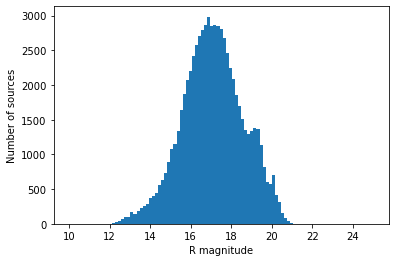

In [94]:
plt.hist(tbl['mean_r'],bins=np.linspace(10,25,100))
plt.xlabel('R magnitude')
_=plt.ylabel('Number of sources')

In [110]:
wgood = (tbl['prob_rrl'] > 0.95) & (tbl['ngooddet_g'] > 100)
good_tbl = tbl[wgood]

We are going to take a random subset of the rows.

In [95]:
rng = np.random.default_rng(seed=42)

In [111]:
random_rows = rng.integers(0,len(good_tbl),100)
random_rows[:10]

array([ 4383, 10872,  5924,  8373,  5473,  3181,  9145, 11598,  3153,
        9319])

In [112]:
good_tbl[random_rows]

objid,source_id,ra,dec,prob_rrl,best_period,ebv,distance,mean_g,mean_r,mean_i,phot_g_mean_mag,amp_1_r,phi_1_r,amp_1_g,phi_1_g,amp_1_i,phi_1_i,amp_2_r,phi_2_r,amp_2_g,phi_2_g,amp_2_i,phi_2_i,amp_3_r,phi_3_r,amp_3_g,phi_3_g,amp_3_i,phi_3_i,ngooddet_g,ngooddet_r,ngooddet_i
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
593109200003353,1814568711277098624,313.224363711014,20.5765570923269,1.0,0.640035,0.161298,16467.7,17.290733,16.89526,16.730509,16.8935,0.14322178,-2.105294,0.21538599,-2.2481728,0.10848492,-1.988761,0.061018553,-2.3148842,0.08347428,-2.313363,0.040983085,-2.2538204,0.030144366,-2.8748865,0.04684447,-2.696811,0.0337405,-2.9888613,131,131,16
815107100001816,1090035937786801024,126.385006650079,61.6384545716927,1.0,0.560765,0.0597984,5788.23,14.769054,14.478809,--,14.4844,0.27168497,-2.8324018,0.39649075,-3.0033724,--,--,0.11642963,2.9254465,0.16371314,2.7926085,--,--,0.089855514,2.1282415,0.11704784,1.900225,--,--,105,125,0
640101100050606,1830429132159862016,304.36437189283,23.8432129577994,0.97,0.356145,0.719128,25059.6,20.312065,19.539421,--,19.534,0.19079095,0.045401007,0.2994809,-0.06746555,--,--,0.035884675,1.6588709,0.055079367,1.3942084,--,--,0.0031470403,-2.5579681,0.022344042,2.922791,--,--,278,460,0
722112100000923,1383422714233536000,241.300774134192,42.1528482911217,0.98,0.492705,0.0119423,18362.2,17.140598,16.993172,17.004004,16.9616,0.3281748,-1.6760166,0.49897578,-1.7966805,0.24985692,-1.4629396,0.16826439,-1.0583154,0.2293134,-1.0314711,0.09351157,-1.0970234,0.13146208,-0.7507943,0.18504946,-0.8112325,0.08890737,-0.62145865,406,418,23
636105300007901,4578860206160558208,273.480050160212,24.6970722179416,1.0,0.325989,0.149598,6458.09,15.619301,15.370329,--,15.386,0.17779334,-2.0160882,0.25716195,-2.057581,--,--,0.019044343,-2.60442,0.020080028,-2.5727189,--,--,0.013694065,2.6313121,0.021378856,2.5771384,--,--,145,137,0
544113200000695,1771589037967714816,321.961819902983,15.4126353426844,1.0,0.59904,0.0872301,17014.9,17.148039,16.855387,16.744041,16.849,0.21100576,0.36164236,0.3132176,0.2939729,0.16076289,0.5456304,0.096449055,2.9046907,0.14741127,2.8592396,0.082202256,2.5622802,0.06079601,-1.2993193,0.089829385,-1.3471452,0.05468944,-0.97086823,258,276,21
745114100000481,971858465230820096,92.8006908718811,51.3974280235141,0.99,0.307052,0.234381,3491.77,14.552142,14.314147,--,14.3176,0.19826852,1.9819124,0.2811622,1.9471291,--,--,0.05100119,-0.3925716,0.068036,-0.47248718,--,--,0.013607131,-2.7645874,0.011737469,-2.9076412,--,--,234,275,0
849107300006142,2258848821387267072,278.637765499742,67.5418023049721,0.99,0.333543,0.0594736,7965.87,15.713789,15.597006,15.584295,15.5785,0.21356525,1.3821732,0.319236,1.3464087,0.16208997,1.4388677,0.03940852,-1.862809,0.059694447,-1.8326324,0.037861533,-2.0992198,0.02027497,1.2982235,0.0301747,1.5146637,0.007887682,1.0132506,429,431,30
544109300036394,1745949290101635584,322.492469397184,12.202729247239,0.97,0.646214,0.109899,10305.5,16.034197,15.775265,15.666201,15.679,0.2645805,0.38014838,0.37799057,0.31255525,0.23047501,0.52586,0.121167436,2.9877172,0.16074307,3.0381718,0.14102647,3.0376225,0.10182647,-0.8613253,0.11394891,-0.9603598,0.086973645,-1.0441464,132,153,22


In [113]:
# astropy Table writing is broken on osx-arm64?
good_tbl[random_rows].to_pandas().to_csv('../data/ztf_rrl_lightcurves/tbl_subset.csv')

In [114]:
tbl_subset = good_tbl[random_rows]

In [84]:
lcq = lightcurve.LCQuery.from_position(185.33612, -1.40382, 5)

In [86]:
lcq

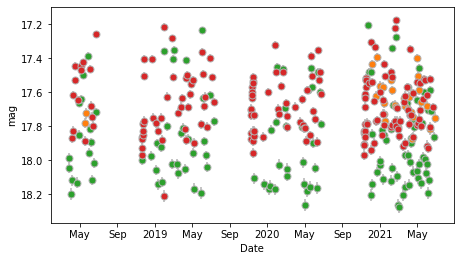

In [87]:
lcq.show()

In [116]:
for i,row in enumerate(tbl_subset):
    fname = f'../data/ztf_rrl_lightcurves/{i}.parquet'
    if not os.path.exists(fname):
        lcq = lightcurve.LCQuery.from_position(row['ra'],row['dec'], 2)
        lcq.to_parquet(fname)